In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import numpy as np
import pandas as pd
import os
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras import layers, models
import glob

import torch
print(torch.__version__)
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import TensorDataset, DataLoader, random_split
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from functools import partial

2.2.1+cu121


In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, Flatten, GlobalAveragePooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image_dataset_from_directory

# Import and Transform Data

In [ ]:
#Change data directories to what is relevant on your drive

train_dataset = image_dataset_from_directory(
    "/content/drive/My Drive/CapstoneNewExcelFiles/ImageFiles/TrainSmall/",
    batch_size=1,  # Adjust batch size according to your need
    image_size=(224, 224),  # ResNet50 default image size is (224, 224), but you can resize if needed
    shuffle=True,
    label_mode='int',  # 'int' for integer labels; 'categorical' for one-hot encoded labels
    seed=123  # Seed for shuffling and transformations
)

# For the validation dataset, make sure to set the same seed and disable shuffle if it's for evaluation
validation_dataset = image_dataset_from_directory(
    "/content/drive/My Drive/CapstoneNewExcelFiles/ImageFiles/TestSmall/",  # Ensure you have this directory for validation
    batch_size=1,
    image_size=(224, 224),
    shuffle= True,
    label_mode='int',
    seed=123
)

Found 3024 files belonging to 3 classes.
Found 759 files belonging to 3 classes.


# Models

In [ ]:
from tensorflow.keras.applications.resnet import preprocess_input

def preprocess_data(image, label):
    return preprocess_input(image), label

train_dataset = train_dataset.map(preprocess_data)
validation_dataset = validation_dataset.map(preprocess_data)

In [ ]:
# from tensorflow.keras.applications import ResNet50
# from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
# from tensorflow.keras.models import Model

# # Load ResNet50 base model
# base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
# base_model.trainable = False  # Freeze the base model

# # Create new model on top
# x = GlobalAveragePooling2D()(base_model.output)
# x = Dense(1024, activation='relu')(x)
# output = Dense(3, activation='softmax')(x)  # Assuming you have 3 classes
# model = Model(inputs=base_model.input, outputs=output)

# # Compile the model
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam  # Import the Adam optimizer

# Load ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create new model on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Assuming you have 3 classes
model = Model(inputs=base_model.input, outputs=output)

# Specify the learning rate
learning_rate = 0.001  # You can change this value to whatever you prefer

# Compile the model using an optimizer object with a specified learning rate
model.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 3s 0us/step


In [ ]:
# # Train the model
# model.fit(train_dataset, epochs=10, validation_data=validation_dataset)

Epoch 1/10
 108/3024 [>.............................] - ETA: 5:51 - loss: 3.0606 - accuracy: 0.4259

In [ ]:
history = model.fit(
    train_dataset,
    epochs=50,
    validation_data=validation_dataset
)

Epoch 1/50
3024/3024 [==============================] - 215s 69ms/step - loss: 1.0601 - accuracy: 0.5460 - val_loss: 0.8249 - val_accuracy: 0.6113
Epoch 2/50
3024/3024 [==============================] - 34s 11ms/step - loss: 0.8720 - accuracy: 0.6009 - val_loss: 0.8440 - val_accuracy: 0.5929
Epoch 3/50
3024/3024 [==============================] - 33s 11ms/step - loss: 0.8225 - accuracy: 0.6290 - val_loss: 0.8100 - val_accuracy: 0.6443
Epoch 4/50
3024/3024 [==============================] - 33s 11ms/step - loss: 0.7849 - accuracy: 0.6505 - val_loss: 0.8248 - val_accuracy: 0.5995
Epoch 5/50
3024/3024 [==============================] - 33s 11ms/step - loss: 0.7564 - accuracy: 0.6561 - val_loss: 0.7840 - val_accuracy: 0.6574
Epoch 6/50
3024/3024 [==============================] - 33s 11ms/step - loss: 0.7307 - accuracy: 0.6772 - val_loss: 0.7995 - val_accuracy: 0.6430
Epoch 7/50
3024/3024 [==============================] - 33s 11ms/step - loss: 0.7124 - accuracy: 0.6815 - val_loss: 0.8855 

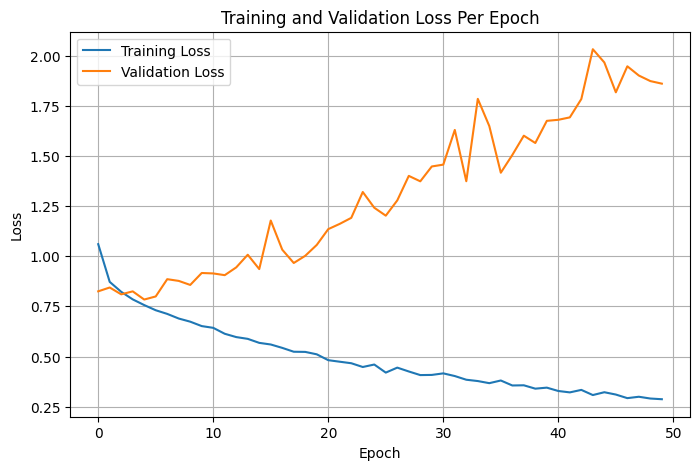

In [ ]:
import matplotlib.pyplot as plt

# Plotting the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

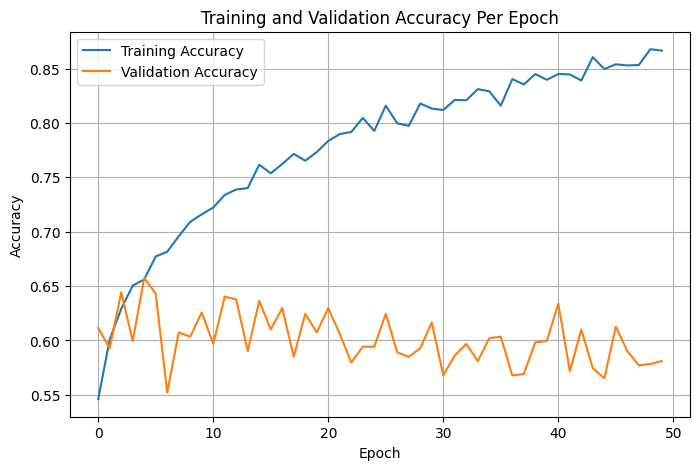

In [ ]:
import matplotlib.pyplot as plt

# Ensure that 'accuracy' is included in your metrics during model compilation
# For example:
# model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Plotting the training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history.history['accuracy'], label='Training Accuracy')  # Use 'acc' instead of 'accuracy' if using TensorFlow 1.x
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')  # Use 'val_acc' if using TensorFlow 1.x
plt.title('Training and Validation Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
# Sample prediction (replace with your actual test data loading if it's different)
y_pred = model.predict(validation_dataset)
y_pred_classes = y_pred.argmax(axis=-1)  # Get the predicted class labels

759/759 [==============================] - 9s 10ms/step


In [ ]:
validation_dataset_values = []
for x, y in validation_dataset:
  validation_dataset_values.append(y.numpy())

validation_dataset_values = np.concatenate(validation_dataset_values)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create the confusion matrix
cm = confusion_matrix(validation_dataset_values, y_pred_classes)

# Convert the confusion matrix to a DataFrame
df_cm = pd.DataFrame(cm, columns=['Infant', 'Parent', 'Other'], index=['Actual Infant', 'Actual Parent', 'Actual Other'])

# Display the confusion matrix
print(df_cm)

               Infant  Parent  Other
Actual Infant     132      72     49
Actual Parent     120      72     61
Actual Other      112      61     80


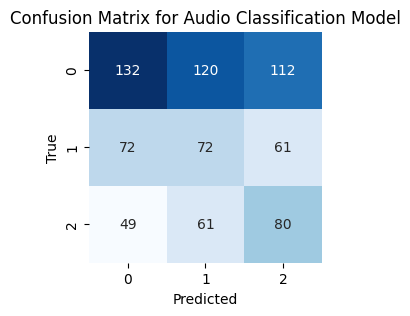

In [ ]:
import seaborn as sns  # This imports the seaborn library and aliases it as 'sns'


conf_matrix = confusion_matrix(y_pred_classes, validation_dataset_values)
# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Audio Classification Model')
plt.show()

Model 2 - decrease learning rates

In [ ]:
# Load ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create new model on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Assuming you have 3 classes
model2 = Model(inputs=base_model.input, outputs=output)

# Specify the learning rate
learning_rate = 0.0001  # You can change this value to whatever you prefer

# Compile the model using an optimizer object with a specified learning rate
model2.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
history2 = model2.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
3024/3024 [==============================] - 46s 14ms/step - loss: 1.0570 - accuracy: 0.5565 - val_loss: 0.9159 - val_accuracy: 0.5968
Epoch 2/10
3024/3024 [==============================] - 42s 14ms/step - loss: 0.8741 - accuracy: 0.6114 - val_loss: 0.9518 - val_accuracy: 0.5889
Epoch 3/10
3024/3024 [==============================] - 41s 14ms/step - loss: 0.8221 - accuracy: 0.6313 - val_loss: 0.8043 - val_accuracy: 0.6416
Epoch 4/10
3024/3024 [==============================] - 42s 14ms/step - loss: 0.7735 - accuracy: 0.6617 - val_loss: 0.8220 - val_accuracy: 0.6232
Epoch 5/10
3024/3024 [==============================] - 42s 14ms/step - loss: 0.7343 - accuracy: 0.6776 - val_loss: 0.7907 - val_accuracy: 0.6469
Epoch 6/10
3024/3024 [==============================] - 41s 13ms/step - loss: 0.6958 - accuracy: 0.7024 - val_loss: 0.9174 - val_accuracy: 0.5995
Epoch 7/10
3024/3024 [==============================] - 43s 14ms/step - loss: 0.6595 - accuracy: 0.7216 - val_loss: 0.8002 -

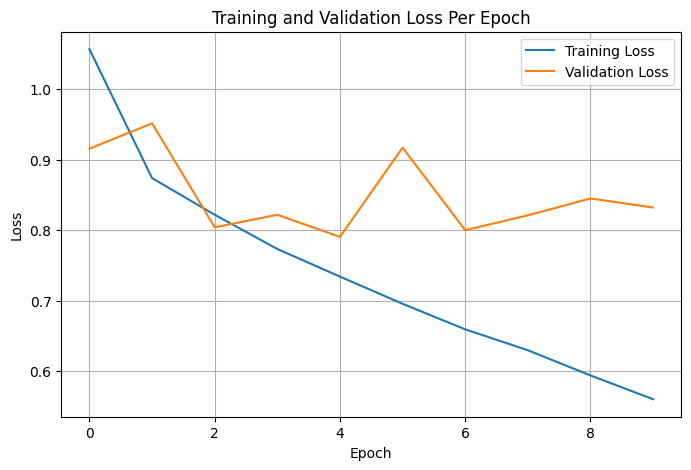

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)
plt.show()

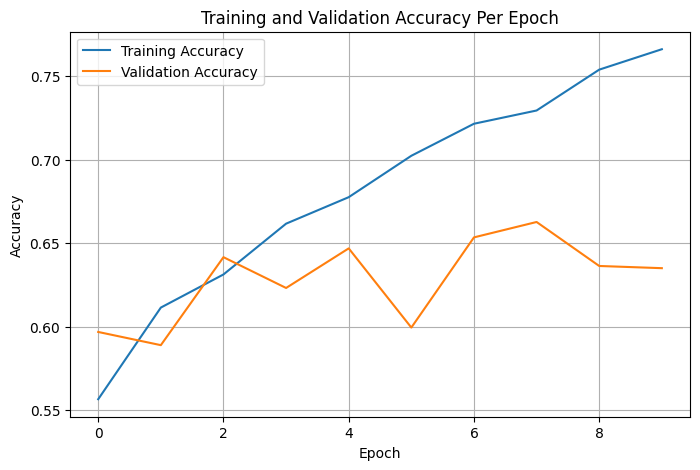

In [ ]:
# Plotting the training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history2.history['accuracy'], label='Training Accuracy')  # Use 'acc' instead of 'accuracy' if using TensorFlow 1.x
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')  # Use 'val_acc' if using TensorFlow 1.x
plt.title('Training and Validation Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Sample prediction (replace with your actual test data loading if it's different)
y_pred = model2.predict(validation_dataset)
y_pred_classes = y_pred.argmax(axis=-1)  # Get the predicted class labels

759/759 [==============================] - 8s 10ms/step


In [ ]:
validation_dataset_values = []
for x, y in validation_dataset:
  validation_dataset_values.append(y.numpy())

validation_dataset_values = np.concatenate(validation_dataset_values)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create the confusion matrix
cm = confusion_matrix(validation_dataset_values, y_pred_classes)

# Convert the confusion matrix to a DataFrame
df_cm = pd.DataFrame(cm, columns=['Infant', 'Parent', 'Other'], index=['Actual Infant', 'Actual Parent', 'Actual Other'])

# Display the confusion matrix
print(df_cm)

               Infant  Parent  Other
Actual Infant      90      89     74
Actual Parent      97      85     71
Actual Other       90      75     88


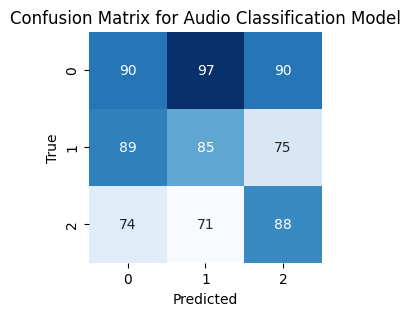

In [ ]:
import seaborn as sns

conf_matrix = confusion_matrix(y_pred_classes, validation_dataset_values)
# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Audio Classification Model')
plt.show()

Model 3 - Even lower learning rate

In [ ]:
# Load ResNet50 base model
base_model = ResNet50(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
base_model.trainable = False  # Freeze the base model

# Create new model on top
x = GlobalAveragePooling2D()(base_model.output)
x = Dense(1024, activation='relu')(x)
output = Dense(3, activation='softmax')(x)  # Assuming you have 3 classes
model3 = Model(inputs=base_model.input, outputs=output)

# Specify the learning rate
learning_rate = 0.00001  # You can change this value to whatever you prefer

# Compile the model using an optimizer object with a specified learning rate
model3.compile(optimizer=Adam(learning_rate=learning_rate), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
history3 = model3.fit(
    train_dataset,
    epochs=10,
    validation_data=validation_dataset
)

Epoch 1/10
3024/3024 [==============================] - 442s 144ms/step - loss: 0.9144 - accuracy: 0.5767 - val_loss: 0.8204 - val_accuracy: 0.6232
Epoch 2/10
3024/3024 [==============================] - 32s 10ms/step - loss: 0.8354 - accuracy: 0.6190 - val_loss: 0.8061 - val_accuracy: 0.6206
Epoch 3/10
3024/3024 [==============================] - 31s 10ms/step - loss: 0.7950 - accuracy: 0.6505 - val_loss: 0.7903 - val_accuracy: 0.6271
Epoch 4/10
3024/3024 [==============================] - 31s 10ms/step - loss: 0.7634 - accuracy: 0.6720 - val_loss: 0.7825 - val_accuracy: 0.6509
Epoch 5/10
3024/3024 [==============================] - 31s 10ms/step - loss: 0.7430 - accuracy: 0.6753 - val_loss: 0.7767 - val_accuracy: 0.6680
Epoch 6/10
3024/3024 [==============================] - 31s 10ms/step - loss: 0.7216 - accuracy: 0.6875 - val_loss: 0.7723 - val_accuracy: 0.6548
Epoch 7/10
3024/3024 [==============================] - 31s 10ms/step - loss: 0.6994 - accuracy: 0.7021 - val_loss: 0.7730

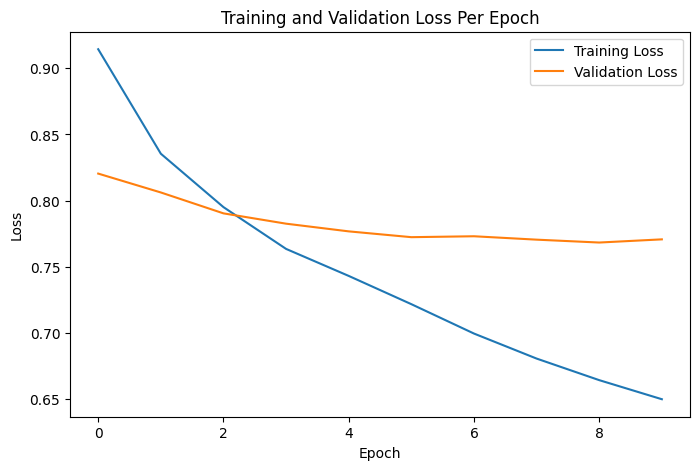

In [ ]:
# Plotting the training and validation loss
plt.figure(figsize=(8, 5))
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(False)
plt.show()

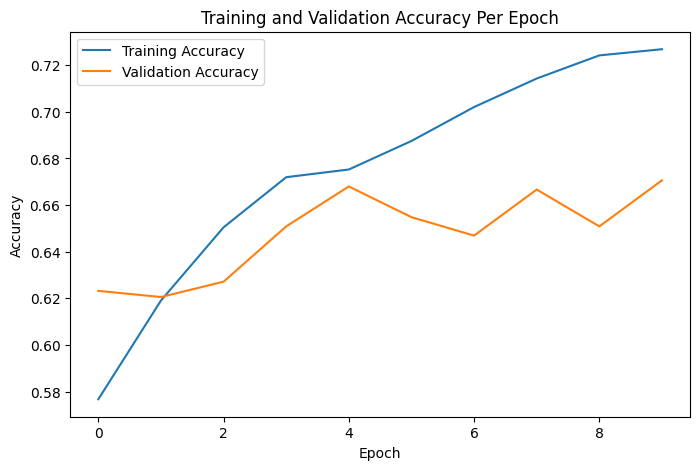

In [ ]:
# Plotting the training and validation accuracy
plt.figure(figsize=(8, 5))
plt.plot(history3.history['accuracy'], label='Training Accuracy')  # Use 'acc' instead of 'accuracy' if using TensorFlow 1.x
plt.plot(history3.history['val_accuracy'], label='Validation Accuracy')  # Use 'val_acc' if using TensorFlow 1.x
plt.title('Training and Validation Accuracy Per Epoch')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.grid(False)
plt.show()

In [ ]:
# Sample prediction (replace with your actual test data loading if it's different)
y_pred = model3.predict(validation_dataset)
y_pred_classes = y_pred.argmax(axis=-1)  # Get the predicted class labels

759/759 [==============================] - 7s 8ms/step


In [ ]:
validation_dataset_values = []
for x, y in validation_dataset:
  validation_dataset_values.append(y.numpy())

validation_dataset_values = np.concatenate(validation_dataset_values)

In [ ]:
from sklearn.metrics import confusion_matrix
import pandas as pd

# Create the confusion matrix
cm = confusion_matrix(validation_dataset_values, y_pred_classes)

# Convert the confusion matrix to a DataFrame
df_cm = pd.DataFrame(cm, columns=['Infant', 'Parent', 'Other'], index=['Actual Infant', 'Actual Parent', 'Actual Other'])

# Display the confusion matrix
print(df_cm)

               Infant  Parent  Other
Actual Infant      81      92     80
Actual Parent      61      93     99
Actual Other       58      89    106


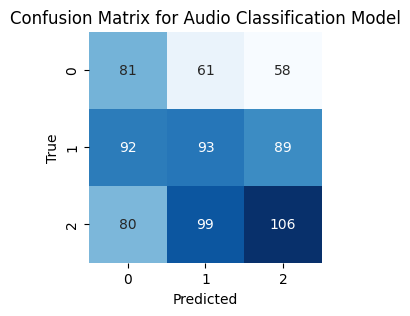

In [ ]:
import seaborn as sns

conf_matrix = confusion_matrix(y_pred_classes, validation_dataset_values)
# Plot confusion matrix
plt.figure(figsize=(3, 3))
sns.heatmap(conf_matrix, annot=True, cmap='Blues', fmt='g', cbar=False)
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix for Audio Classification Model')
plt.show()

In [ ]:
(101+103+94)/(101+73+65+78+103+93+74+77+94)

0.39313984168865435

# Creating The Algorithm

Writing function to load in mp3 file and make predictions using a model

In [ ]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
from io import BytesIO

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from io import BytesIO
from PIL import Image
from PIL import Image

def predict_on_MP3(file, model):
    file_name = file.split("/")[-1].split(".mp3")[0]
    print("Processing: "+ file_name)

    # Load the entire audio file
    audio, sr = librosa.load(file, sr=16000)

    frame_size = 2048
    hop_size = 512
    y_axis = "linear"

    # Determine the length of the audio file in seconds and create 3-second intervals
    audio_length_sec = len(audio) / sr
    interval_duration = 3  # interval length in seconds

    predictions = []
    add_info = []

    for start_sec in np.arange(0, audio_length_sec, interval_duration):
        end_sec = start_sec + interval_duration

        # Convert to samples
        start_sample = int(start_sec * sr)
        end_sample = int(end_sec * sr)

        if end_sample > len(audio):
            end_sample = len(audio)  # Adjust end sample to audio length

        audio_interval = audio[start_sample:end_sample]
        D = librosa.stft(audio_interval)
        D_magnitude = np.abs(D)
        D_db = librosa.amplitude_to_db(D_magnitude, ref=np.max)

        # Use BytesIO to create an in-memory image file
        img_buffer = BytesIO()
        plt.figure(figsize=(25, 9))
        plt.axis('off')
        _ = librosa.display.specshow(D_db, sr=sr, hop_length=hop_size, x_axis="time", y_axis=y_axis)
        plt.savefig(img_buffer, format='png', bbox_inches='tight', pad_inches=0)
        plt.close()

        # Prepare the image for prediction
        img_buffer.seek(0)
        image = Image.open(img_buffer).convert('RGB')  # Convert the image to RGB to ensure it has 3 channels
        image = image.resize((224, 224))  # Resize the image to the expected input size of the model
        image = img_to_array(image)  # Convert the image to an array
        image = np.expand_dims(image, axis=0)  # Add batch dimension

        # Predict and store the result
        y_pred = model.predict(image)
        predictions.append(y_pred)
        add_info.append([start_sec, end_sec])

        #add_info.append([start_sec, end_sec])
        print(f"Processed and predicted interval from {start_sec}s to {end_sec}s of file {file}")

    return predictions, add_info

Predict on first test file

In [ ]:
# Path to the directory containing CSV files
directory_path = "/content/drive/My Drive/CapstoneNewExcelFiles/MP3Files/"

test_files = [directory_path + '138 T1 part 1 child audio.mp3',
              directory_path + '199 T1 child audio.mp3',
              directory_path + '209 T2 part 3 child audio.mp3',
              directory_path + '262 T2 part 2 child audio.mp3',
              directory_path + '287 T2 part 2 child audio.mp3',
              directory_path + '301 T1 part 2 child audio.mp3',
              directory_path + '522 T1 part 4 child audio.mp3',
              directory_path + '554 T1 part 2 child audio.mp3',
              directory_path + '110 T2 part 2 child audio.mp3',
              directory_path + '531 T2 part 2 child audio.mp3']

In [ ]:
test_files[0]

'/content/drive/My Drive/CapstoneNewExcelFiles/MP3Files/138 T1 part 1 child audio.mp3'

In [ ]:
import numpy as np
import librosa
import librosa.display
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing.image import img_to_array, load_img
from io import BytesIO
from PIL import Image

def convert_to_MP3_v2(file, model, interval_duration=3, max_duration=None):
    file_name = file.split("/")[-1].split(".mp3")[0]
    print("Processing: " + file_name)

    # Load the entire audio file
    audio, sr = librosa.load(file, sr=16000)

    frame_size = 2048
    hop_size = 512
    y_axis = "linear"

    # Determine the length of the audio file in seconds
    audio_length_sec = len(audio) / sr

    # If max_duration is provided and it is less than the total length, adjust audio_length_sec
    if max_duration is not None and max_duration < audio_length_sec:
        audio_length_sec = max_duration

    predictions = []
    add_info = []

    for start_sec in np.arange(0, audio_length_sec, interval_duration):
        end_sec = start_sec + interval_duration

        # Adjust end_sec if it goes beyond the specified max_duration
        if end_sec > audio_length_sec:
            end_sec = audio_length_sec

        # Convert time in seconds to sample indices
        start_sample = int(start_sec * sr)
        end_sample = int(end_sec * sr)

        audio_interval = audio[start_sample:end_sample]
        D = librosa.stft(audio_interval)
        D_magnitude = np.abs(D)
        D_db = librosa.amplitude_to_db(D_magnitude, ref=np.max)

        # Use BytesIO to create an in-memory image file
        img_buffer = BytesIO()
        plt.figure(figsize=(25, 9))
        plt.axis('off')
        _ = librosa.display.specshow(D_db, sr=sr, hop_length=hop_size, x_axis="time", y_axis=y_axis)
        plt.savefig(img_buffer, format='png', bbox_inches='tight', pad_inches=0)
        plt.close()

        # Prepare the image for prediction
        img_buffer.seek(0)
        image = Image.open(img_buffer).convert('RGB')  # Convert the image to RGB
        image = image.resize((224, 224))  # Resize the image to the expected input size of the model
        image = img_to_array(image)  # Convert the image to an array
        image = np.expand_dims(image, axis=0)  # Add batch dimension

        # Predict and store the result
        y_pred = model.predict(image)
        predictions.append(y_pred)

        add_info.append([start_sec, end_sec])
        print(f"Processed and predicted interval from {start_sec}s to {end_sec}s of file {file}")

        # Break if the end of the specified duration is reached
        if end_sec >= audio_length_sec:
            break

    return predictions, add_info


In [ ]:
# 1 hour = 3600 second

audio_file = test_files[0]
model = model3
max_dur = 3600

In [ ]:
pred, info = convert_to_MP3_v2(audio_file, model, interval_duration=3, max_duration=max_dur)

Processing: 138 T1 part 1 child audio
1/1 [==============================] - 0s 29ms/step
Processed and predicted interval from 0s to 3s of file /content/drive/My Drive/CapstoneNewExcelFiles/MP3Files/138 T1 part 1 child audio.mp3
1/1 [==============================] - 0s 26ms/step
Processed and predicted interval from 3s to 6s of file /content/drive/My Drive/CapstoneNewExcelFiles/MP3Files/138 T1 part 1 child audio.mp3
1/1 [==============================] - 0s 25ms/step
Processed and predicted interval from 6s to 9s of file /content/drive/My Drive/CapstoneNewExcelFiles/MP3Files/138 T1 part 1 child audio.mp3
1/1 [==============================] - 0s 25ms/step
Processed and predicted interval from 9s to 12s of file /content/drive/My Drive/CapstoneNewExcelFiles/MP3Files/138 T1 part 1 child audio.mp3
1/1 [==============================] - 0s 25ms/step
Processed and predicted interval from 12s to 15s of file /content/drive/My Drive/CapstoneNewExcelFiles/MP3Files/138 T1 part 1 child audio.mp3

In [ ]:
preds = np.concatenate(pred)

In [ ]:
preds.shape

(1200, 3)

In [ ]:
preds

array([[0.01050194, 0.19133313, 0.7981649 ],
       [0.02878909, 0.1532449 , 0.81796604],
       [0.02008956, 0.4433113 , 0.5365991 ],
       ...,
       [0.01210063, 0.03523855, 0.9526608 ],
       [0.01182039, 0.22933796, 0.7588417 ],
       [0.03815033, 0.11008011, 0.85176957]], dtype=float32)

In [ ]:
pwd

'/content'

In [ ]:
cd /content/drive/My Drive/CapstoneNewExcelFiles/

/content/drive/My Drive/CapstoneNewExcelFiles


In [ ]:
# Convert the array to a DataFrame
df = pd.DataFrame(preds, columns=["Infant_pro", "Adult_prob", "Other_prob"])

# Save the DataFrame to CSV
df.to_csv("algorithm_text_data.csv", index=False)  # index=False means do not write row names (index)

In [ ]:
path = "/content/drive/My Drive/CapstoneNewExcelFiles/"

In [ ]:
file_df = pd.read_csv(path + "algorithm_text_data.csv")

In [ ]:
file_df

,Infant_pro,Adult_prob,Other_prob
0,0.010502,0.191333,0.798165
1,0.028789,0.153245,0.817966
2,0.020090,0.443311,0.536599
3,0.026884,0.508743,0.464373
4,0.010884,0.167168,0.821948
...,...,...,...
1195,0.037652,0.096877,0.865472
1196,0.006220,0.058054,0.935726
1197,0.012101,0.035239,0.952661
1198,0.011820,0.229338,0.758842
